In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import hmean,gmean
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
train=pd.read_csv('Data/train_data.csv')
test=pd.read_csv('Data/test_data.csv')
sub=pd.read_csv('Data/sample_submission.csv')

In [69]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [70]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [71]:
train['Claim'].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

In [72]:
len(sub)

3068

In [73]:
train.shape,test.shape

((7160, 14), (3069, 13))

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [75]:
#train['Geo_Code'].value_counts

In [76]:
#test['Geo_Code'].value_counts

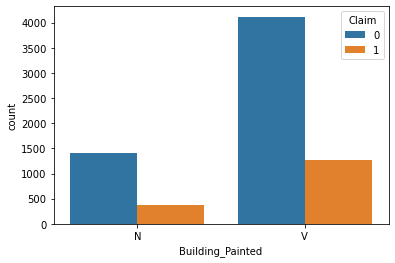

In [77]:
sns.countplot(train['Building_Painted'],hue='Claim',data=train)

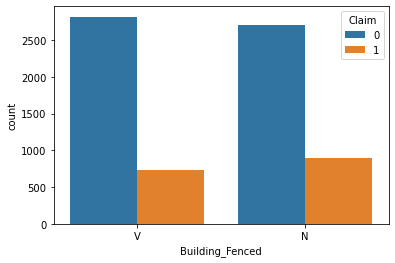

In [78]:
sns.countplot(train['Building_Fenced'],hue='Claim',data=train)

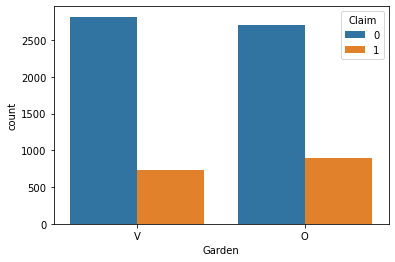

In [79]:
sns.countplot(train['Garden'],hue='Claim',data=train)

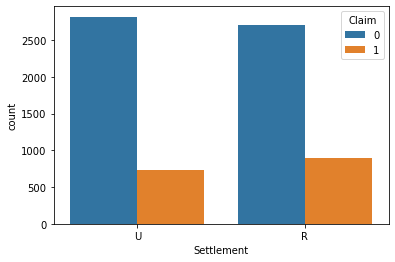

In [80]:
sns.countplot(train['Settlement'],hue='Claim',data=train)

In [81]:
pd.crosstab(train['Building_Type'],train['Claim'],normalize=True)

Claim,0,1
Building_Type,,
1,0.197207,0.042458
2,0.362151,0.099441
3,0.128352,0.043436
4,0.084078,0.042877


In [82]:
pd.crosstab(train['NumberOfWindows'],train['Claim'],normalize=True)

Claim,0,1
NumberOfWindows,,
.,0.393715,0.102235
1,0.009497,0.000978
2,0.045112,0.005587
3,0.099581,0.018296
4,0.100140,0.031006
5,0.062430,0.026816
6,0.028073,0.014665
7,0.016899,0.012570
8,0.008520,0.007682


In [83]:
train['NumberOfWindows'].value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

In [84]:
#train.loc[:,train.dtypes == np.float64]
train.dtypes[train.dtypes == 'float64']

Insured_Period        float64
Building Dimension    float64
Date_of_Occupancy     float64
dtype: object

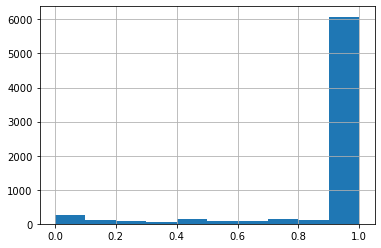

In [85]:
train['Insured_Period'].hist()

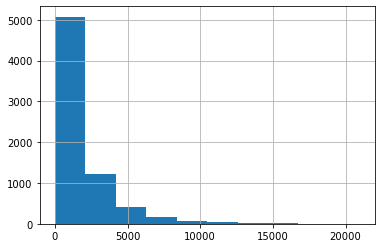

In [86]:
train['Building Dimension'].hist()

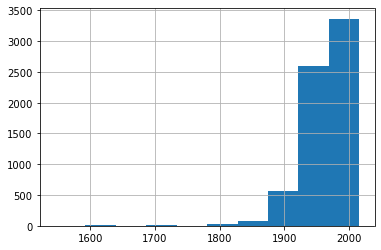

In [87]:
train['Date_of_Occupancy'].hist()

In [88]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [89]:
train['Insured_Period'].value_counts()

1.000000    5325
0.997268     547
0.000000     165
0.747945      60
0.495890      49
            ... 
0.680328       1
0.819672       1
0.792350       1
0.378082       1
0.803279       1
Name: Insured_Period, Length: 401, dtype: int64

In [90]:
#pd.crosstab(train['Insured_Period'],train['Claim'])

In [91]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [92]:
pd.crosstab(train['Residential'],train['Claim'],normalize=True)*100

Claim,0,1
Residential,,
0,54.832402,14.622905
1,22.346369,8.198324


In [93]:
train['Building_Fenced'] = train['Building_Fenced'].replace({'N':1, 'V':0})
train['Building_Painted'] = train['Building_Painted'].replace({'N':1, 'V':0})
train['Garden'] = train['Garden'].replace({'V':1, 'O':0})
train['Settlement'] = train['Settlement'].replace({'U':1, 'R':0})

In [94]:
test['Building_Fenced'] = test['Building_Fenced'].replace({'N':1, 'V':0})
test['Building_Painted'] = test['Building_Painted'].replace({'N':1, 'V':0})
test['Garden'] = test['Garden'].replace({'V':1, 'O':0})
test['Settlement'] = test['Settlement'].replace({'U':1, 'R':0})

In [95]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7153.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,0.248324,0.503911,0.496435,0.495810,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,0.432071,0.500020,0.500022,0.500017,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,0.000000,0.000000,0.000000,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [96]:
train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [97]:
test['NumberOfWindows'].value_counts()

   .    2240
3        227
4        194
5        151
6         70
2         70
7         54
8         26
1         16
>=10      11
9         10
Name: NumberOfWindows, dtype: int64

In [98]:
train['Building Dimension'].median()

1083.0

In [99]:
test['Building Dimension'].median()

900.0

In [100]:
train['Building Dimension']=train['Building Dimension'].fillna(value=1083.0)
test['Building Dimension']=test['Building Dimension'].fillna(value=900.0)

In [101]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,1.0,1,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,0,1,0.0,0,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,1,0,1.0,1,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,0,0,1.0,1,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,0,1,0.0,0,680.0,1,1800.0,3,1053,0


In [102]:
train['Geo_Code'] = train['Geo_Code'].fillna(value=-1)
test['Geo_Code'] = test['Geo_Code'].fillna(value=-1)

In [103]:
train['Date_of_Occupancy'] = train['Date_of_Occupancy'].fillna(value=-1)
test['Date_of_Occupancy'] = test['Date_of_Occupancy'].fillna(value=-1)

In [104]:
train['Garden'] = train['Garden'].fillna(value=-1)
test['Garden'] = test['Garden'].fillna(value=-1)

In [105]:
train['NumberOfWindows'].value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

In [106]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,1.0,1,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,0,1,0.0,0,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,1,0,1.0,1,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,0,0,1.0,1,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,0,1,0.0,0,680.0,1,1800.0,3,1053,0


In [107]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,0,1,0.0,0,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,0,1,0.0,0,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,0,0,1.0,1,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,0,1,0.0,0,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,0,1,0.0,0,1405.0,1,2004.0,3,3321


In [108]:
wind_train=pd.get_dummies(train['NumberOfWindows'])
wind_test=pd.get_dummies(test['NumberOfWindows'])

In [109]:
train=pd.concat([train,wind_train],axis=1)
test=pd.concat([test,wind_test],axis=1)

In [110]:
train = train.drop('NumberOfWindows', axis=1)
test = test.drop('NumberOfWindows', axis=1)

In [111]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,...,1,2,3,4,5,6,7,8,9,>=10
0,H14663,2013,1.0,0,1,0,1.0,1,290.0,1,...,0,0,0,0,0,0,0,0,0,0
1,H2037,2015,1.0,0,0,1,0.0,0,490.0,1,...,0,0,0,1,0,0,0,0,0,0
2,H3802,2014,1.0,0,1,0,1.0,1,595.0,1,...,0,0,0,0,0,0,0,0,0,0
3,H3834,2013,1.0,0,0,0,1.0,1,2840.0,1,...,0,0,0,0,0,0,0,0,0,0
4,H5053,2014,1.0,0,0,1,0.0,0,680.0,1,...,0,0,1,0,0,0,0,0,0,0


In [112]:
train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Geo_Code',
       'Claim', '   .', '1', '2', '3', '4', '5', '6', '7', '8', '9', '>=10'],
      dtype='object')

In [113]:
train['Geo_Code']=train['Geo_Code'].map(train['Geo_Code'].value_counts().to_dict())
test['Geo_Code']=test['Geo_Code'].map(test['Geo_Code'].value_counts().to_dict())

In [114]:
train.to_csv('ins1_train.csv',index=False)
test.to_csv('ins1_test.csv',index=False)

In [115]:
train.corr()['Claim']

YearOfObservation    -0.016367
Insured_Period        0.088715
Residential           0.063509
Building_Painted     -0.029857
Building_Fenced       0.051657
Garden               -0.052236
Settlement           -0.052019
Building Dimension    0.295558
Building_Type         0.112168
Date_of_Occupancy     0.019288
Geo_Code              0.034749
Claim                 1.000000
   .                 -0.052171
1                    -0.033066
2                    -0.064988
3                    -0.063584
4                     0.007600
5                     0.053896
6                     0.057861
7                     0.082347
8                     0.075198
9                     0.055776
>=10                  0.068126
Name: Claim, dtype: float64

In [116]:
train.corr()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,...,1,2,3,4,5,6,7,8,9,>=10
YearOfObservation,1.000000,0.025434,-0.040391,-0.056881,0.120373,-0.119031,-0.120103,0.010959,0.005490,0.041636,...,0.016640,0.025284,0.027514,0.070955,0.022006,0.043974,0.007594,0.030647,-0.007111,0.003292
Insured_Period,0.025434,1.000000,-0.037620,0.037077,0.047091,-0.047744,-0.046504,0.008822,-0.017811,0.182661,...,0.000905,-0.003204,0.009733,0.031148,0.024436,0.019055,-0.006668,0.012417,-0.018813,0.008783
Residential,-0.040391,-0.037620,1.000000,0.032927,0.082448,-0.081257,-0.082684,0.056357,0.334039,-0.081502,...,0.018143,-0.020563,-0.029900,-0.005223,0.032779,0.086251,0.094223,0.068616,0.033224,0.011133
Building_Painted,-0.056881,0.037077,0.032927,1.000000,-0.574757,0.573813,0.575081,-0.089176,0.048541,-0.028621,...,-0.059136,-0.132828,-0.209106,-0.223304,-0.177656,-0.119848,-0.096332,-0.073759,-0.043791,-0.055862
Building_Fenced,0.120373,0.047091,0.082448,-0.574757,1.000000,-0.997784,-0.999441,0.136512,0.020430,0.266582,...,0.102085,0.229297,0.362705,0.385484,0.310596,0.209649,0.172895,0.127328,0.082364,0.093532
Garden,-0.119031,-0.047744,-0.081257,0.573813,-0.997784,1.000000,0.997783,-0.137255,-0.018432,-0.266205,...,-0.101462,-0.227895,-0.363077,-0.383952,-0.311626,-0.208367,-0.171839,-0.126549,-0.081860,-0.095844
Settlement,-0.120103,-0.046504,-0.082684,0.575081,-0.999441,0.997783,1.000000,-0.136369,-0.020320,-0.265657,...,-0.102028,-0.229169,-0.362502,-0.385268,-0.310423,-0.209531,-0.172799,-0.127256,-0.082318,-0.096379
Building Dimension,0.010959,0.008822,0.056357,-0.089176,0.136512,-0.137255,-0.136369,1.000000,0.009184,0.090890,...,-0.026262,-0.082400,-0.087850,-0.010729,0.096021,0.126407,0.122390,0.142835,0.102398,0.216200
Building_Type,0.005490,-0.017811,0.334039,0.048541,0.020430,-0.018432,-0.020320,0.009184,1.000000,-0.086072,...,-0.017433,-0.052477,-0.088880,-0.043411,0.027669,0.090353,0.141140,0.099293,0.053826,-0.002258
Date_of_Occupancy,0.041636,0.182661,-0.081502,-0.028621,0.266582,-0.266205,-0.265657,0.090890,-0.086072,1.000000,...,0.029957,0.065840,0.094462,0.100408,0.083605,0.056362,0.044826,0.032374,0.023069,0.027780


In [117]:
pd.crosstab(train['Settlement'],train['Garden'])


Garden,-1.0,0.0,1.0
Settlement,,,
0,7,3602,1
1,0,0,3550


In [118]:
pd.crosstab(train['Settlement'],train['Building_Fenced'])

Building_Fenced,0,1
Settlement,,
0,2,3608
1,3550,0


In [119]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,...,1,2,3,4,5,6,7,8,9,>=10
0,H14663,2013,1.0,0,1,0,1.0,1,290.0,1,...,0,0,0,0,0,0,0,0,0,0
1,H2037,2015,1.0,0,0,1,0.0,0,490.0,1,...,0,0,0,1,0,0,0,0,0,0
2,H3802,2014,1.0,0,1,0,1.0,1,595.0,1,...,0,0,0,0,0,0,0,0,0,0
3,H3834,2013,1.0,0,0,0,1.0,1,2840.0,1,...,0,0,0,0,0,0,0,0,0,0
4,H5053,2014,1.0,0,0,1,0.0,0,680.0,1,...,0,0,1,0,0,0,0,0,0,0


In [120]:
train['paint_fence'] = train['Building_Painted'] + train['Building_Fenced']
train['paint_fence'] = train['Building_Painted'] + train['Garden']
train['paint_fence'] = train['Building_Painted'] + train['Residential']

In [121]:
test['paint_fence'] = test['Building_Painted'] + test['Building_Fenced']
test['paint_fence'] = test['Building_Painted'] + test['Garden']
test['paint_fence'] = test['Building_Painted'] + test['Residential']

In [122]:
train.to_csv('ins2_train.csv', index=False)
test.to_csv('ins2_test.csv', index=False)

In [123]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,...,2,3,4,5,6,7,8,9,>=10,paint_fence
0,H14663,2013,1.0,0,1,0,1.0,1,290.0,1,...,0,0,0,0,0,0,0,0,0,1
1,H2037,2015,1.0,0,0,1,0.0,0,490.0,1,...,0,0,1,0,0,0,0,0,0,0
2,H3802,2014,1.0,0,1,0,1.0,1,595.0,1,...,0,0,0,0,0,0,0,0,0,1
3,H3834,2013,1.0,0,0,0,1.0,1,2840.0,1,...,0,0,0,0,0,0,0,0,0,0
4,H5053,2014,1.0,0,0,1,0.0,0,680.0,1,...,0,1,0,0,0,0,0,0,0,0


In [124]:
train['Insured_Period_r'] = train['Insured_Period'].round(1)
test['Insured_Period_r'] = test['Insured_Period'].round(1)

In [125]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,...,3,4,5,6,7,8,9,>=10,paint_fence,Insured_Period_r
0,H14663,2013,1.0,0,1,0,1.0,1,290.0,1,...,0,0,0,0,0,0,0,0,1,1.0
1,H2037,2015,1.0,0,0,1,0.0,0,490.0,1,...,0,1,0,0,0,0,0,0,0,1.0
2,H3802,2014,1.0,0,1,0,1.0,1,595.0,1,...,0,0,0,0,0,0,0,0,1,1.0
3,H3834,2013,1.0,0,0,0,1.0,1,2840.0,1,...,0,0,0,0,0,0,0,0,0,1.0
4,H5053,2014,1.0,0,0,1,0.0,0,680.0,1,...,1,0,0,0,0,0,0,0,0,1.0


In [126]:
def month(x):
    if x == 0.0:
        return 1
    elif x == 0.1:
        return 2
    elif x == 0.2:
        return 3
    elif x == 0.3:
        return 4
    elif x == 0.4:
        return 5
    elif x == 0.5:
        return 6
    elif x == 0.6:
        return 7
    elif x == 0.7:
        return 8
    elif x == 0.8:
        return 9
    elif x == 0.9:
        return 10
    else:
        return 12

In [127]:
train['month']=train['Insured_Period_r'].apply(month)
test['month']=test['Insured_Period_r'].apply(month)

In [ ]:
train = train.drop('Insured_Period_r', axis=1)
test = test.drop('Insured_Period_r', axis=1)

In [128]:
train.corr()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,...,4,5,6,7,8,9,>=10,paint_fence,Insured_Period_r,month
YearOfObservation,1.000000,0.025434,-0.040391,-0.056881,0.120373,-0.119031,-0.120103,0.010959,0.005490,0.041636,...,0.070955,0.022006,0.043974,0.007594,0.030647,-0.007111,0.003292,-0.067277,0.028527,0.031222
Insured_Period,0.025434,1.000000,-0.037620,0.037077,0.047091,-0.047744,-0.046504,0.008822,-0.017811,0.182661,...,0.031148,0.024436,0.019055,-0.006668,0.012417,-0.018813,0.008783,-0.002039,0.998774,0.995839
Residential,-0.040391,-0.037620,1.000000,0.032927,0.082448,-0.081257,-0.082684,0.056357,0.334039,-0.081502,...,-0.005223,0.032779,0.086251,0.094223,0.068616,0.033224,0.011133,0.739824,-0.036676,-0.039090
Building_Painted,-0.056881,0.037077,0.032927,1.000000,-0.574757,0.573813,0.575081,-0.089176,0.048541,-0.028621,...,-0.223304,-0.177656,-0.119848,-0.096332,-0.073759,-0.043791,-0.055862,0.696796,0.036352,0.034825
Building_Fenced,0.120373,0.047091,0.082448,-0.574757,1.000000,-0.997784,-0.999441,0.136512,0.020430,0.266582,...,0.385484,0.310596,0.209649,0.172895,0.127328,0.082364,0.093532,-0.327737,0.048284,0.047404
Garden,-0.119031,-0.047744,-0.081257,0.573813,-0.997784,1.000000,0.997783,-0.137255,-0.018432,-0.266205,...,-0.383952,-0.311626,-0.208367,-0.171839,-0.126549,-0.081860,-0.095844,0.327956,-0.048934,-0.048090
Settlement,-0.120103,-0.046504,-0.082684,0.575081,-0.999441,0.997783,1.000000,-0.136369,-0.020320,-0.265657,...,-0.385268,-0.310423,-0.209531,-0.172799,-0.127256,-0.082318,-0.096379,0.327785,-0.047680,-0.046802
Building Dimension,0.010959,0.008822,0.056357,-0.089176,0.136512,-0.137255,-0.136369,1.000000,0.009184,0.090890,...,-0.010729,0.096021,0.126407,0.122390,0.142835,0.102398,0.216200,-0.019586,0.008526,0.007485
Building_Type,0.005490,-0.017811,0.334039,0.048541,0.020430,-0.018432,-0.020320,0.009184,1.000000,-0.086072,...,-0.043411,0.027669,0.090353,0.141140,0.099293,0.053826,-0.002258,0.272402,-0.017273,-0.016147
Date_of_Occupancy,0.041636,0.182661,-0.081502,-0.028621,0.266582,-0.266205,-0.265657,0.090890,-0.086072,1.000000,...,0.100408,0.083605,0.056362,0.044826,0.032374,0.023069,0.027780,-0.077757,0.181838,0.175642


In [129]:
train.to_csv('ins3_train.csv',index=False)
test.to_csv('ins3_test.csv',index=False)

In [130]:
train.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
Geo_Code              0
Claim                 0
   .                  0
1                     0
2                     0
3                     0
4                     0
5                     0
6                     0
7                     0
8                     0
9                     0
>=10                  0
paint_fence           0
Insured_Period_r      0
month                 0
dtype: int64